In [1]:
import numpy as np
import os
from keras.layers import Conv3D, MaxPooling3D
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape
#from keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import gc
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.preprocessing import LabelEncoder
import sklearn
import seaborn as sns
import tensorflow as tf
from keras import regularizers
from tensorflow.keras.utils import to_categorical
from prettytable import PrettyTable
from matplotlib import pyplot as plt

import time

# CNN


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import KFold
import time

# Define constants
# Define constants
IMAGE_SIZE = (96, 72)
BATCH_SIZE = 16
EPOCHS = 100
NUM_CLASSES = 17
TRAIN_DATA_DIR = "C:\\Users\\sumit\\Downloads\\Noise reduction 2\\output_denoised_image_folder"
K_FOLDS=5

# Load the data
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

data_generator = datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

# Initialize KFold
kf = KFold(n_splits=K_FOLDS, shuffle=True)

# Track start time
start_time = time.time()

# Initialize arrays to store accuracies and computational times
train_accuracies = []
val_accuracies = []
comp_times = []

# K-fold cross-validation loop
for fold, (train_index, val_index) in enumerate(kf.split(data_generator), 1):
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    ).flow_from_directory(
        TRAIN_DATA_DIR,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=True,
        subset='training',
        seed=42
    )

    validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    ).flow_from_directory(
        TRAIN_DATA_DIR,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False,
        subset='validation',
        seed=42
    )

    # Define the CNN model
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(NUM_CLASSES, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

Found 417 images belonging to 17 classes.
Found 339 images belonging to 17 classes.
Found 78 images belonging to 17 classes.
Found 339 images belonging to 17 classes.
Found 78 images belonging to 17 classes.
Found 339 images belonging to 17 classes.
Found 78 images belonging to 17 classes.
Found 339 images belonging to 17 classes.
Found 78 images belonging to 17 classes.
Found 339 images belonging to 17 classes.
Found 78 images belonging to 17 classes.


# Model Summary

In [3]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 94, 70, 64)        1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 47, 35, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 45, 33, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 22, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 20, 14, 128)       147584    
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 10, 7, 128)      

# Model Training

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import KFold
import time

# Define constants
# Define constants
IMAGE_SIZE = (96, 72)
BATCH_SIZE = 16
EPOCHS = 100
NUM_CLASSES = 17
TRAIN_DATA_DIR = "C:\\Users\\sumit\\Downloads\\Noise reduction 2\\output_denoised_image_folder"
K_FOLDS=5

# Load the data
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

data_generator = datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

# Initialize KFold
kf = KFold(n_splits=K_FOLDS, shuffle=True)

# Track start time
start_time = time.time()

# Initialize arrays to store accuracies and computational times
train_accuracies = []
val_accuracies = []
comp_times = []

# K-fold cross-validation loop
for fold, (train_index, val_index) in enumerate(kf.split(data_generator), 1):
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    ).flow_from_directory(
        TRAIN_DATA_DIR,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=True,
        subset='training',
        seed=42
    )

    validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    ).flow_from_directory(
        TRAIN_DATA_DIR,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False,
        subset='validation',
        seed=42
    )

    # Define the CNN model
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(NUM_CLASSES, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // BATCH_SIZE,
        verbose=1
    )

    # Evaluate the model
    train_loss, train_acc = model.evaluate(train_generator)
    val_loss, val_acc = model.evaluate(validation_generator)

    print(f"Fold {fold}:")
    print(f"Train accuracy: {train_acc}, Validation accuracy: {val_acc}")
    print(f"Training time for fold {fold}: {time.time() - start_time} seconds\n")

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    comp_times.append(time.time() - start_time)

    # Save the model for this fold
    model.save(f'cnn_kfold(1)_{fold}.h5')

# Track end time
end_time = time.time()

print("K-Fold Cross Validation Complete.")
# Print average accuracies and computational time
print("Average Training Accuracy:", np.mean(train_accuracies)*100,"%")
print("Average Validation Accuracy:", np.mean(val_accuracies)*100,"%")
print("Average Training Time:", np.mean(comp_times))
print("Total Training Time:", end_time - start_time)


Found 417 images belonging to 17 classes.
Found 339 images belonging to 17 classes.
Found 78 images belonging to 17 classes.
Epoch 1/100
21/21 [==============================] - 6s 95ms/step - loss: 2.8441 - accuracy: 0.0446 - val_loss: 2.8327 - val_accuracy: 0.0781
Epoch 2/100
21/21 [==============================] - 1s 36ms/step - loss: 2.8334 - accuracy: 0.0588 - val_loss: 2.8310 - val_accuracy: 0.1094
Epoch 3/100
21/21 [==============================] - 0s 17ms/step - loss: 2.8012 - accuracy: 0.0991 - val_loss: 2.7481 - val_accuracy: 0.1562
Epoch 4/100
21/21 [==============================] - 0s 17ms/step - loss: 2.7211 - accuracy: 0.1207 - val_loss: 2.6870 - val_accuracy: 0.1875
Epoch 5/100
21/21 [==============================] - 0s 17ms/step - loss: 2.5646 - accuracy: 0.1548 - val_loss: 2.5193 - val_accuracy: 0.1719
Epoch 6/100
21/21 [==============================] - 0s 18ms/step - loss: 2.4152 - accuracy: 0.1858 - val_loss: 2.4194 - val_accuracy: 0.1875
Epoch 7/100
21/21 [====

# Training accuracy

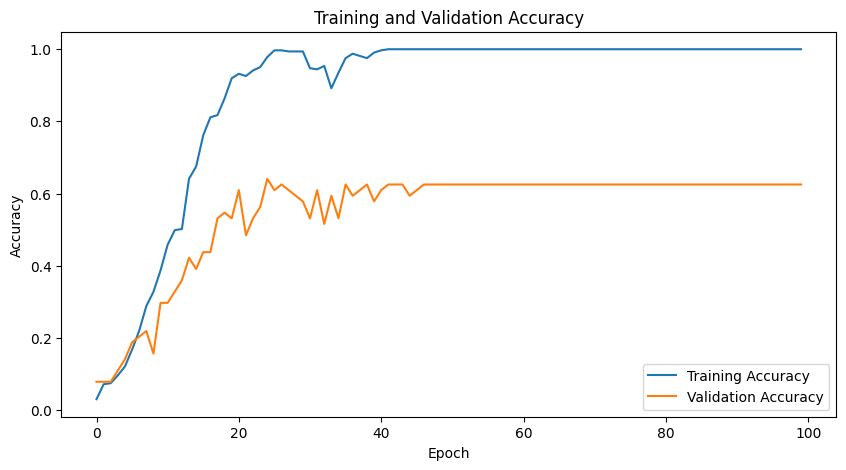

In [5]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ROC CURVE

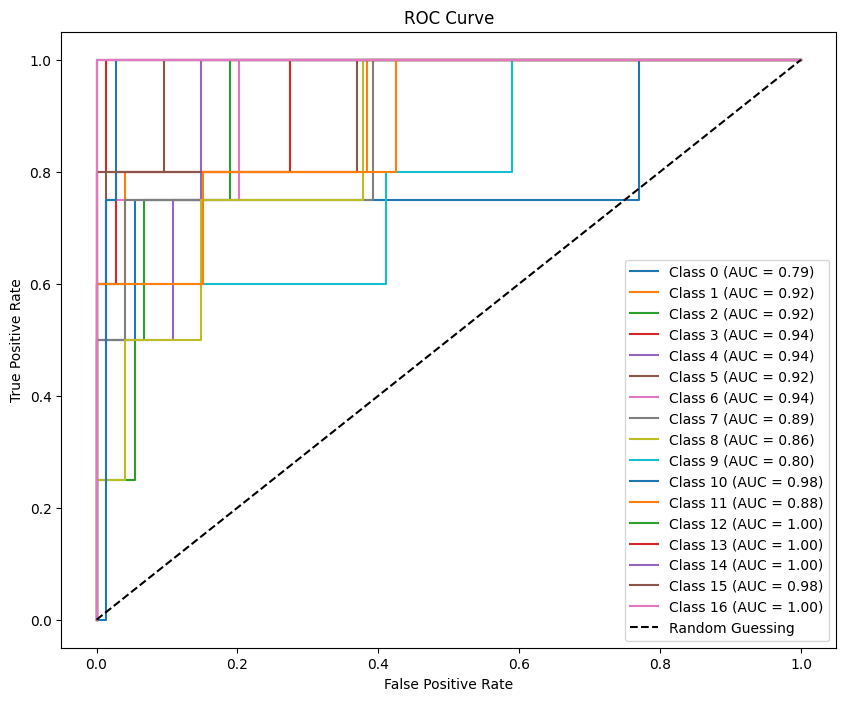

In [6]:
y_pred = model.predict(validation_generator)
y_true = validation_generator.classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(NUM_CLASSES):
    fpr[i], tpr[i], _ = roc_curve((y_true == i).astype(int), y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(NUM_CLASSES):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix

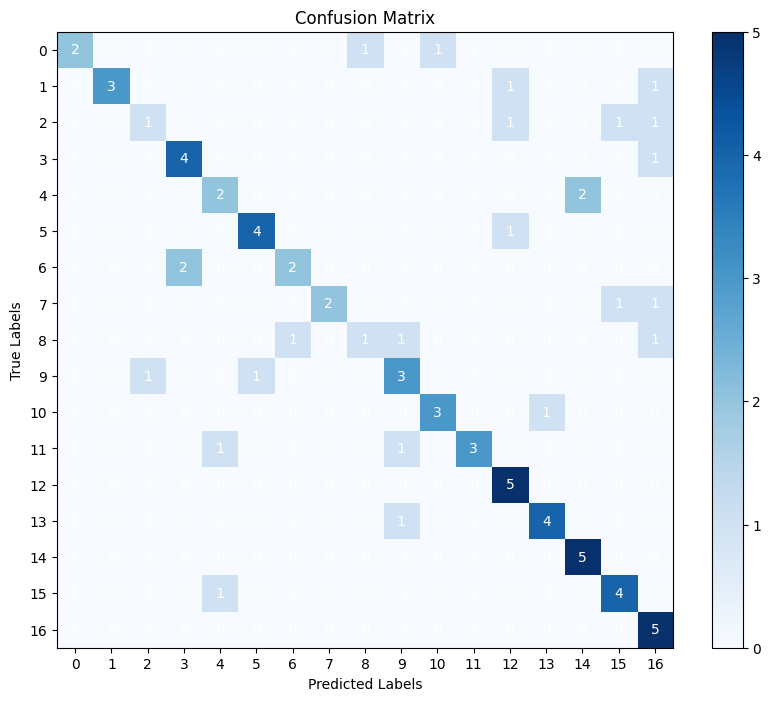

In [7]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(NUM_CLASSES))
plt.yticks(np.arange(NUM_CLASSES))
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()


# F1 score support

In [8]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from prettytable import PrettyTable
import pandas as pd
import time

# Assuming you already have the necessary variables defined in your code
train_predictions = model.predict(train_generator)
validation_predictions = model.predict(validation_generator)

# Convert predictions to class labels
train_pred_labels = np.argmax(train_predictions, axis=1)
validation_pred_labels = np.argmax(validation_predictions, axis=1)

# True labels for training and validation sets
train_true_labels = train_generator.classes
validation_true_labels = validation_generator.classes

# Calculate metrics
train_report = classification_report(train_true_labels, train_pred_labels, target_names=train_generator.class_indices)
validation_report = classification_report(validation_true_labels, validation_pred_labels, target_names=validation_generator.class_indices)

# Additional metrics using confusion matrix
train_conf_matrix = confusion_matrix(train_true_labels, train_pred_labels)
validation_conf_matrix = confusion_matrix(validation_true_labels, validation_pred_labels)

# Calculate precision, recall, F1 score, and support
train_precision, train_recall, train_f1_score, train_support = precision_recall_fscore_support(train_true_labels, train_pred_labels)
validation_precision, validation_recall, validation_f1_score, validation_support = precision_recall_fscore_support(validation_true_labels, validation_pred_labels)

# Create PrettyTable for training metrics
train_table = PrettyTable()
train_table.field_names = ["Class", "Precision", "Recall", "F1 Score", "Support"]

# Populate the table with training metrics
for class_name, precision, recall, f1_score, support in zip(
        train_generator.class_indices.keys(),
        train_precision,
        train_recall,
        train_f1_score,
        train_support
):
    train_table.add_row([class_name, precision, recall, f1_score, support])

# Create PrettyTable for validation metrics
validation_table = PrettyTable()
validation_table.field_names = ["Class", "Precision", "Recall", "F1 Score", "Support"]

# Populate the table with validation metrics
for class_name, precision, recall, f1_score, support in zip(
        validation_generator.class_indices.keys(),
        validation_precision,
        validation_recall,
        validation_f1_score,
        validation_support
):
    validation_table.add_row([class_name, precision, recall, f1_score, support])

# Print tables
print("Training Metrics:")
print(train_table)

print("\nValidation Metrics:")
print(validation_table)

# ... (your existing code)

# Create DataFrames for training and validation metrics
train_df = pd.DataFrame({
    'Dataset': 'Training',
    'Class': list(train_generator.class_indices.keys()),
    'Precision': train_precision,
    'Recall': train_recall,
    'F1 Score': train_f1_score,
    'Support': train_support
})

validation_df = pd.DataFrame({
    'Dataset': 'Validation',
    'Class': list(validation_generator.class_indices.keys()),
    'Precision': validation_precision,
    'Recall': validation_recall,
    'F1 Score': validation_f1_score,
    'Support': validation_support
})

# Concatenate DataFrames
combined_df = pd.concat([train_df, validation_df], ignore_index=True)

# Save combined DataFrame to an Excel sheet
combined_excel_path = 'combined_metricsCNNkfold5.xlsx'
combined_df.to_excel(combined_excel_path, index=False)

print(f"Combined metrics saved to {combined_excel_path}")



Training Metrics:
+-------+----------------------+----------------------+----------------------+---------+
| Class |      Precision       |        Recall        |       F1 Score       | Support |
+-------+----------------------+----------------------+----------------------+---------+
|   0   | 0.15789473684210525  | 0.15789473684210525  | 0.15789473684210525  |    19   |
|   1   |         0.0          |         0.0          |         0.0          |    20   |
|   10  | 0.058823529411764705 | 0.058823529411764705 | 0.058823529411764705 |    17   |
|   2   | 0.041666666666666664 | 0.041666666666666664 | 0.041666666666666664 |    24   |
|   3   | 0.05263157894736842  | 0.05263157894736842  | 0.05263157894736842  |    19   |
|   4   |         0.0          |         0.0          |         0.0          |    20   |
|   5   | 0.17647058823529413  | 0.17647058823529413  | 0.17647058823529413  |    17   |
|   6   | 0.11764705882352941  | 0.11764705882352941  | 0.11764705882352941  |    17   |
|  